In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import copy
import importlib
import functions
import numpy as np
import json
#import seaborn as sns

importlib.reload(functions)

<module 'functions' from 'c:\\Users\\Lenovo\\Documents\\Études\\Ecole_Ingénieur\\2A\\TR-Economie\\Projet_de_recherche\\analysingEffectOfHealthPlanInFrance\\code\\functions.py'>

In [13]:
elements = os.listdir("../Open-CCAM-data")
unique_values = []

for i in range(len(elements)):
    if (i+2015) in [2015, 2016, 2017, 2018, 2019]:
        df=pd.read_excel(f'../Open-CCAM-data/{i+2015}_CCAM.xls', sheet_name=1)
    else:
        df=pd.read_excel(f'../Open-CCAM-data/{i+2015}_CCAM.xlsx', sheet_name=1)

    print(i+2015)
    values = df["Catégorie d'acte"].unique().tolist()
    for value in values:
        if value in unique_values:
            continue
        else:
            unique_values.append(value)

2015
2016
2017
2018
2019
2020
2021
2022
2023


In [15]:
print(unique_values)

['Autres Actes de Chirurgie', 'Autres Actes Médicaux Thérapeutiques', 'Exploration électrophysiologique du système nerveux [EEG, EMG, sommeil]', 'Autres Échographies', 'Autres radiographies', 'IRM du système nerveux', 'Autres Actes Médicaux Diagnostiques', 'Autres Scintigraphies', 'Scanographie du système nerveux', 'Tépographie', "Infiltration d'un nerf, plexus ou racine pour prise en charge de la douleur chronique", 'Exploration de la motricité oculaire ou palpébrale', "Examen fonctionnel et direct de l'oeil, hors annexes", nan, 'Autres scanographies', "Séance de préparation à l'irradiation en radiothérapie", 'Chirurgie du canal carpien', "Autres examens à visée K d'exérèse", 'Exérèse de lésion cutanée, sous cutanée ou des tissus mous', 'Réparation par lambeau local ou régional', 'Destruction de lésion cutanée superficielle', "Imagerie, photographie, angiographie de l'oeil", 'Chirurgie de la cataracte et actes thérapeutiques associés', 'Injection dans le corps vitré', "Photocoagulatio

In [31]:
to_keep = ["Parodontologie", "Avulsion dents permanentes", "Avulsion dents de sagesse", "Réparation de prothèses", "Avulsion dents temporaires", "Inlay-core", "Prothèses amovibles", "Bridges", "Prothèses fixées", "Autres soins conservateurs", "Traitement de caries", "Radiographies intra-buccales", "Chirurgie dentaire", "Soins conservateurs", "Prothèses", "Radiologie dentaire", "Autres actes de chirurgie dentaire", "Endodontie", "Implantologie", "Autres avulsions", "Autres soins conservateurs"]

**Titles :**

1st level : "Catégorie d'acte"

2nd level : "Sous-catégorie d'acte"

3rd level : "Libellé long"

In [28]:
df = pd.read_excel('../Open-CCAM-data/2015_CCAM.xls', sheet_name=1)

In [26]:
df.columns

Index(['Code Acte', 'Code acte/activité/phase', 'Libellé long',
       'Code Activité', 'Code Phase', 'Code Regroupement',
       'Tarif secteur 1 et 2 adhérant au CAS',
       'Tarif secteur 2 non adhérant au CAS', 'Quantité d'actes ',
       'Base de remboursement ', 'Montants remboursés', 'Catégorie d'acte',
       'Sous-catégorie d'acte'],
      dtype='object')

In [3]:
elements = os.listdir("../Open-CCAM-data")
unique_values = []

for i in range(len(elements)):
    if (i+2015) in [2015, 2016, 2017, 2018, 2019]:
        df=pd.read_excel(f'../Open-CCAM-data/{i+2015}_CCAM.xls', sheet_name=1)
    else:
        df=pd.read_excel(f'../Open-CCAM-data/{i+2015}_CCAM.xlsx', sheet_name=1)

    print(len(df.columns))

13
13
13
13
13
13
13
13
13


In [4]:
df.columns

Index(['Code Acte', 'Code acte/activité/phase', 'Libellé long',
       'Code Activité', 'Code Phase', 'Code regroupement',
       'Tarif secteur 1 et 2 adhérant à l'OPTAM/OPTAM-CO',
       'Tarif secteur 2 non adhérant à l'OPTAM/OPTAM-CO', 'Quantité d'actes ',
       'Base de remboursement ', 'Montants remboursés', 'Catégorie d'acte',
       'Sous-catégorie d'acte'],
      dtype='object')

In [ ]:
to_keep = ["Parodontologie", "Avulsion dents permanentes", "Avulsion dents de sagesse", "Réparation de prothèses", "Avulsion dents temporaires", "Inlay-core", "Prothèses amovibles", "Bridges", "Prothèses fixées", "Autres soins conservateurs", "Traitement de caries", "Radiographies intra-buccales", "Chirurgie dentaire", "Soins conservateurs", "Prothèses", "Radiologie dentaire", "Autres actes de chirurgie dentaire", "Endodontie", "Implantologie", "Autres avulsions", "Autres soins conservateurs"]

In [43]:
to_keep = ["Inlay-core", "Prothèses amovibles", "Bridges", "Prothèses fixées", "Prothèses"]

In [44]:
def gov_exp_dental():
    elements = os.listdir("../Open-CCAM-data")
    unique_values = []

    expenditures = {}
    #nb_LPP_codes = {}
    nb_refunds = {}
    refund_rate = {}
    base = {}

    for i in range(len(elements)):
        if (i+2015) in [2015, 2016, 2017, 2018, 2019]:
            df=pd.read_excel(f'../Open-CCAM-data/{i+2015}_CCAM.xls', sheet_name=1)
        else:
            df=pd.read_excel(f'../Open-CCAM-data/{i+2015}_CCAM.xlsx', sheet_name=1)

        print(i+2015)
        
        mask = df["Catégorie d'acte"].isin(to_keep)
        df = df[mask]
        
        df = pd.DataFrame(
            {
                "Complet": df.iloc[:, 2],
                "Cat. acte": df.iloc[:, -2],
                "Sous-cat. acte": df.iloc[:, -1],
                "QTE": df.iloc[:, -5],
                "REM": df.iloc[:, -3],
                "BSE": df.iloc[:, -4],
            }
        )
        
        df.reset_index(inplace=True)
        df.drop(columns="index", inplace=True)
        df = df.dropna()
        df = df.reset_index(drop=True)

        key = str(i+2015)
        
        sum = df["REM"].sum()
        base_sum = df["BSE"].sum()

        expenditures[key] = sum
        base[key] = base_sum

        rate = []
        if len(df) == 0:
            refund_rate[key] = 0
        else:
            for i in range(len(df)):
                if (
                    pd.isna(df.loc[i, "REM"])
                    or pd.isna(df.loc[i, "BSE"])
                    or df.loc[i, "BSE"] == 0
                ):
                    continue
                else:
                    rate.append(df.loc[i, "REM"] / df.loc[i, "BSE"])
            refund_rate[key] = np.mean(rate)
        # print(f"key : {key}")

        #nb_LPP_codes[key] = len(df["CODE_LPP"].unique().tolist())
        nb_refunds[key] = df["QTE"].sum()

    return [expenditures, nb_refunds, refund_rate, base]

In [45]:
dental = gov_exp_dental()

2015
2016
2017
2018
2019
2020
2021
2022
2023


In [46]:
dental[0]

{'2015': 1077921661.166021,
 '2016': 1092005317.85849,
 '2017': 1091496457.048503,
 '2018': 1136948640.1584888,
 '2019': 1063603628.9995539,
 '2020': 1051433637.7999575,
 '2021': 1351690992.599947,
 '2022': 1360267025.4599376,
 '2023': 1360862632.4399493}

In [2]:
#manque 600M par rapport aux chiffres de la drees (pr 2023 et 2022, pas fait les autres)

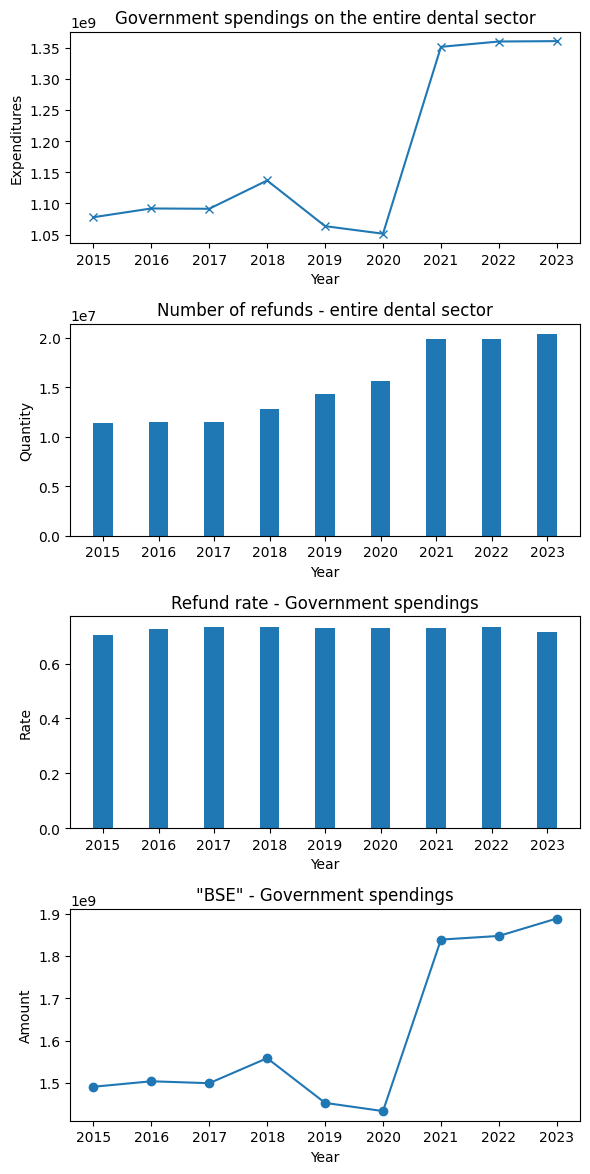

In [47]:
width = 0.35
list_years = [year for year in dental[0]]
fig, axes = plt.subplots(4, 1, figsize=(6, 12))
axes = axes.flatten()

axes[0].plot(list_years, dental[0].values(), color="#1f77b4", marker="x")
axes[0].set_title(
    f"Government spendings on the entire dental sector"
)
axes[0].set_ylabel("Expenditures")

axes[1].bar(list_years, dental[1].values(), width=width, color="#1f77b4")
axes[1].set_title(f"Number of refunds - entire dental sector")
axes[1].set_ylabel("Quantity")

axes[2].bar(list_years, dental[2].values(), color="#1f77b4", width=width)
axes[2].set_title(f"Refund rate - Government spendings")
axes[2].set_ylabel("Rate")

axes[3].plot(list_years, dental[3].values(), color="#1f77b4", marker="o")
axes[3].set_title(f'"BSE" - Government spendings')
axes[3].set_ylabel("Amount")

for i in range(len(axes)):

    axes[i].set_xlabel("Year")
    axes[i].set_xticks(list_years)

plt.tight_layout()
plt.show()

In [11]:
df = pd.read_excel("../Open-CCAM-data/2017_CCAM.xls", sheet_name=1)

df = pd.DataFrame(
    {
        "Complet": df.iloc[:, 2],
        "Cat. acte": df.iloc[:, -2],
        "Sous-cat. acte": df.iloc[:, -1],
        "QTE": df.iloc[:, -5],
        "REM": df.iloc[:, -3],
        "BSE": df.iloc[:, -4],
    }
)

max(df["REM"])

In [18]:
mask = (df["REM"] == 11565810767.810158)

In [19]:
df[mask]

,Complet,Cat. acte,Sous-cat. acte,QTE,REM,BSE
0,Exérèse de tumeur intraparenchymateuse du cerv...,Autres Actes de Chirurgie,Actes chirurgicaux,86,1.156581e+10,5.479197e+04
1,Exérèse de tumeur intraparenchymateuse du cerv...,Autres Actes de Chirurgie,Actes chirurgicaux,77,1.156581e+10,3.984436e+04
2,Exérèse de tumeur intraparenchymateuse du cerv...,Autres Actes de Chirurgie,Actes chirurgicaux,394,1.156581e+10,1.294122e+05
3,Exérèse de tumeur intraparenchymateuse du cerv...,Autres Actes de Chirurgie,Actes chirurgicaux,448,1.156581e+10,2.630168e+05
4,"Exérèse de lésion du tronc cérébral, par crani...",Autres Actes de Chirurgie,Actes chirurgicaux,7,1.156581e+10,3.515860e+03
...,...,...,...,...,...,...
12478,Examen histopathologique de biopsie de 4 struc...,Autres examens de biopsie,Autres examens de biopsie,6425,1.156581e+10,6.432990e+05
12479,Examen histopathologique de biopsies étagés de...,Examen de biopsie étagée,Examen de biopsie étagée,49456,1.156581e+10,3.627087e+06
12480,NaN,Examen de biopsie avec cartographie,Examen de biopsie avec cartographie,1,1.156581e+10,8.469000e+01
12481,Examen histopathologique de biopsies d'une str...,Examen de biopsie avec cartographie,Examen de biopsie avec cartographie,73382,1.156581e+10,6.231129e+06
